# SR-Dyna (Novel Revaluation Task)

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib
import matplotlib.animation as manimation

In [48]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/sr-dyna/srdyna.py'>

Loaded 10x10 world with 100 states


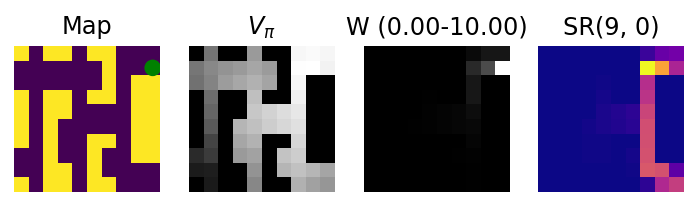

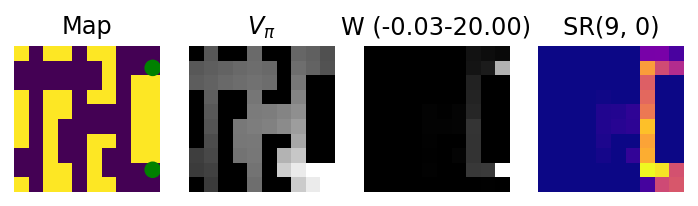

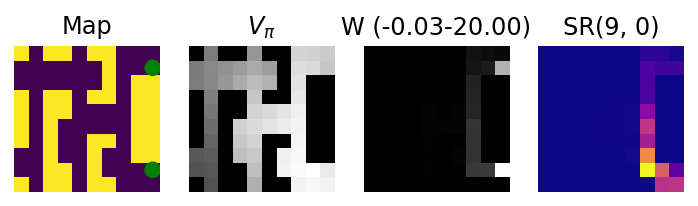

In [49]:
# Latent Learning
REPLAY = "sufficient"
EXPLORE_STEPS = 25000
S1_S2_TRIALS = 20
POST_REWARD_STEPS = 40
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
S1_LOC = (0, 2)
S2_LOC = (8, 1)
env = srdyna.SimpleGridWorld(world='worlds/latent_learning.txt', max_reward_locs=2)
agent = srdyna.SRDyna(id=0, loc=(0, 2), env=env)

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
R1_LOC = (9, 8)
env.add_reward(R1_LOC, 10)

for i in range(POST_REWARD_STEPS):
    # Repeated one-step runs from R1
    agent.terminate_episode(reset_state=env.state_at_loc(R1_LOC))
    agent.step(verbose=False)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=9)

# Trials from S1 or S2 (until R1 reached)
for i in range(S1_S2_TRIALS):
    s_loc = S1_LOC if i % 2 == 0 else S2_LOC
    agent.terminate_episode(reset_state=env.state_at_loc(s_loc))
    done = False
    steps = 0
    MAX_STEPS = 1000
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1
        
# Add second reward
R2_LOC = (9, 1)
env.add_reward(R2_LOC, 20)

# Learn about R2 - repeated one-step runs from R2
for i in range(POST_REWARD_STEPS):
    agent.terminate_episode(reset_state=env.state_at_loc(R2_LOC))
    agent.step(verbose=False)

agent.make_plots(sr_state=9)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=9)

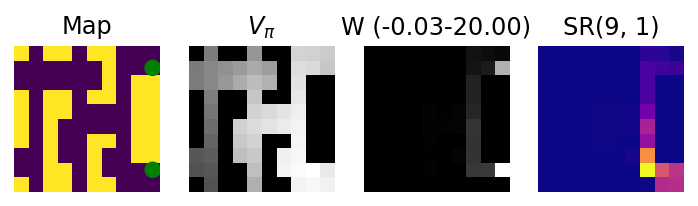

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.40157071e-19 1.63523321e-19 3.02913580e-19 2.07938462e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.23790726e-17 4.92585371e-17 7.36273979e-17 5.17202405e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.92314760e-16 3.02948134e-16 3.18976831e-15 4.13695125e-16
 2.58944238e-15 2.38423594e-16 5.55200693e-15 1.12293199e-14
 1.91774748e-16 1.33801083e-16 1.70881173e-16 1.47249650e-16
 3.86900725e-19 3.10025145e-19 3.25633789e-19 2.72166672e-19
 2.49808591e-19 2.86173700e-19 3.29533753e-19 3.51047205e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.50257859e-17 1.19548672e-16 1.22840824e-16 8.55739977e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.32874500e-16 3.087167

In [50]:
loc = (9, 1)
agent.make_plots(sr_state=env.state_at_loc(loc))
sa = agent.state_action_index(env.state_at_loc(loc), 0)
best = agent.H[sa, :].argmax()
print(agent.H[sa, :], best)
print(env.loc_at_state(best))

In [51]:
print(env.state_at_loc((9, 1)))
agent.state_action_index(env.state_at_loc((9, 1)), 0)

19


76

In [52]:
agent.replay_buffer[-100:]

array([[26026,    77,     2,    87,     1],
       [26027,    87,     1,    88,     3],
       [26028,    88,     3,    88,     3],
       [26029,    88,     3,    88,     1],
       [26030,    88,     1,    89,     0],
       [26031,    89,     0,   100,     0],
       [26032,    18,     0,    17,     2],
       [26033,    17,     2,    27,     2],
       [26034,    27,     2,    37,     2],
       [26035,    37,     2,    47,     2],
       [26036,    47,     2,    57,     2],
       [26037,    57,     2,    67,     2],
       [26038,    67,     2,    77,     2],
       [26039,    77,     2,    87,     1],
       [26040,    87,     1,    88,     3],
       [26041,    88,     3,    88,     1],
       [26042,    88,     1,    89,     0],
       [26043,    89,     0,   100,     0],
       [26044,    20,     1,    21,     0],
       [26045,    21,     0,    20,     1],
       [26046,    20,     1,    21,     2],
       [26047,    21,     2,    31,     2],
       [26048,    31,     2,    

In [53]:
# Generate anim (slow)
# agent.record_trials(title="novel_revaluation", 
#                     learning=True,
#                     start_locs=[(0, 2), (4, 0), (9, 0), (0, 8)])